# Bike Sharing Assignment
# Import all required libraries

In [502]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
#import statsmodels.api as sm
#from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso


#### Data Loading

In [503]:
df = pd.read_csv(r"C:\Users\chaih\OneDrive\Documents\UpGrad\inputs\train.csv")

In [504]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [505]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [506]:
null_percent = 75
null_count = int(((100 - null_percent) / 100) * df.shape[0] + 1)
# axis=1 => columns
# thresh => Delete columns which contains less than minimum thresh number of non-null values.
df = df.dropna(axis=1, thresh=null_count)
df = df.drop("Id", axis=1)

In [507]:
df.shape

(1460, 76)

In [508]:
null_cols = df.isnull().sum()
# find out columns which have nulls
null_cols = null_cols[null_cols > 0]
null_cols

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [509]:
df = df.drop(["FireplaceQu", "LotFrontage", 'Utilities', 'Street'], axis=1)

In [510]:
df["MasVnrArea"].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [511]:
#Get age of the property from its years
df["YearBuilt_Age"] = 2022 - df["YearBuilt"]
df['YearRemodAdd_Age'] = 2022 - df['YearRemodAdd']
df['YrSold_Age'] = 2022 - df['YrSold']
df['GarageYrBlt_Age'] = 2022 - df['GarageYrBlt']

# Dropping columns
df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [512]:
df[["YearBuilt_Age", "YearRemodAdd_Age", "YrSold_Age", "GarageYrBlt_Age"]]

,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age
0,19,19,14,19.0
1,46,46,15,46.0
2,21,20,14,21.0
3,107,52,16,24.0
4,22,22,14,22.0
...,...,...,...,...
1455,23,22,15,23.0
1456,44,34,12,44.0
1457,81,16,12,81.0
1458,72,26,12,72.0


In [513]:
null_cols = df.isnull().sum()
# find out columns which have nulls
null_cols = null_cols[null_cols > 0]
null_cols

MasVnrType          8
MasVnrArea          8
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Electrical          1
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
GarageYrBlt_Age    81
dtype: int64

In [514]:
null_cols = ["MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
"Electrical", "GarageType", "GarageFinish", "GarageYrBlt_Age", "GarageQual", "GarageCond"]

In [515]:
for col in null_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [516]:
df["MasVnrArea"] = df["MasVnrArea"].fillna(df["MasVnrArea"].mean()) 

In [517]:
null_cols = df.isnull().sum()
# find out columns which have nulls
null_cols = null_cols[null_cols > 0]
null_cols

Series([], dtype: int64)

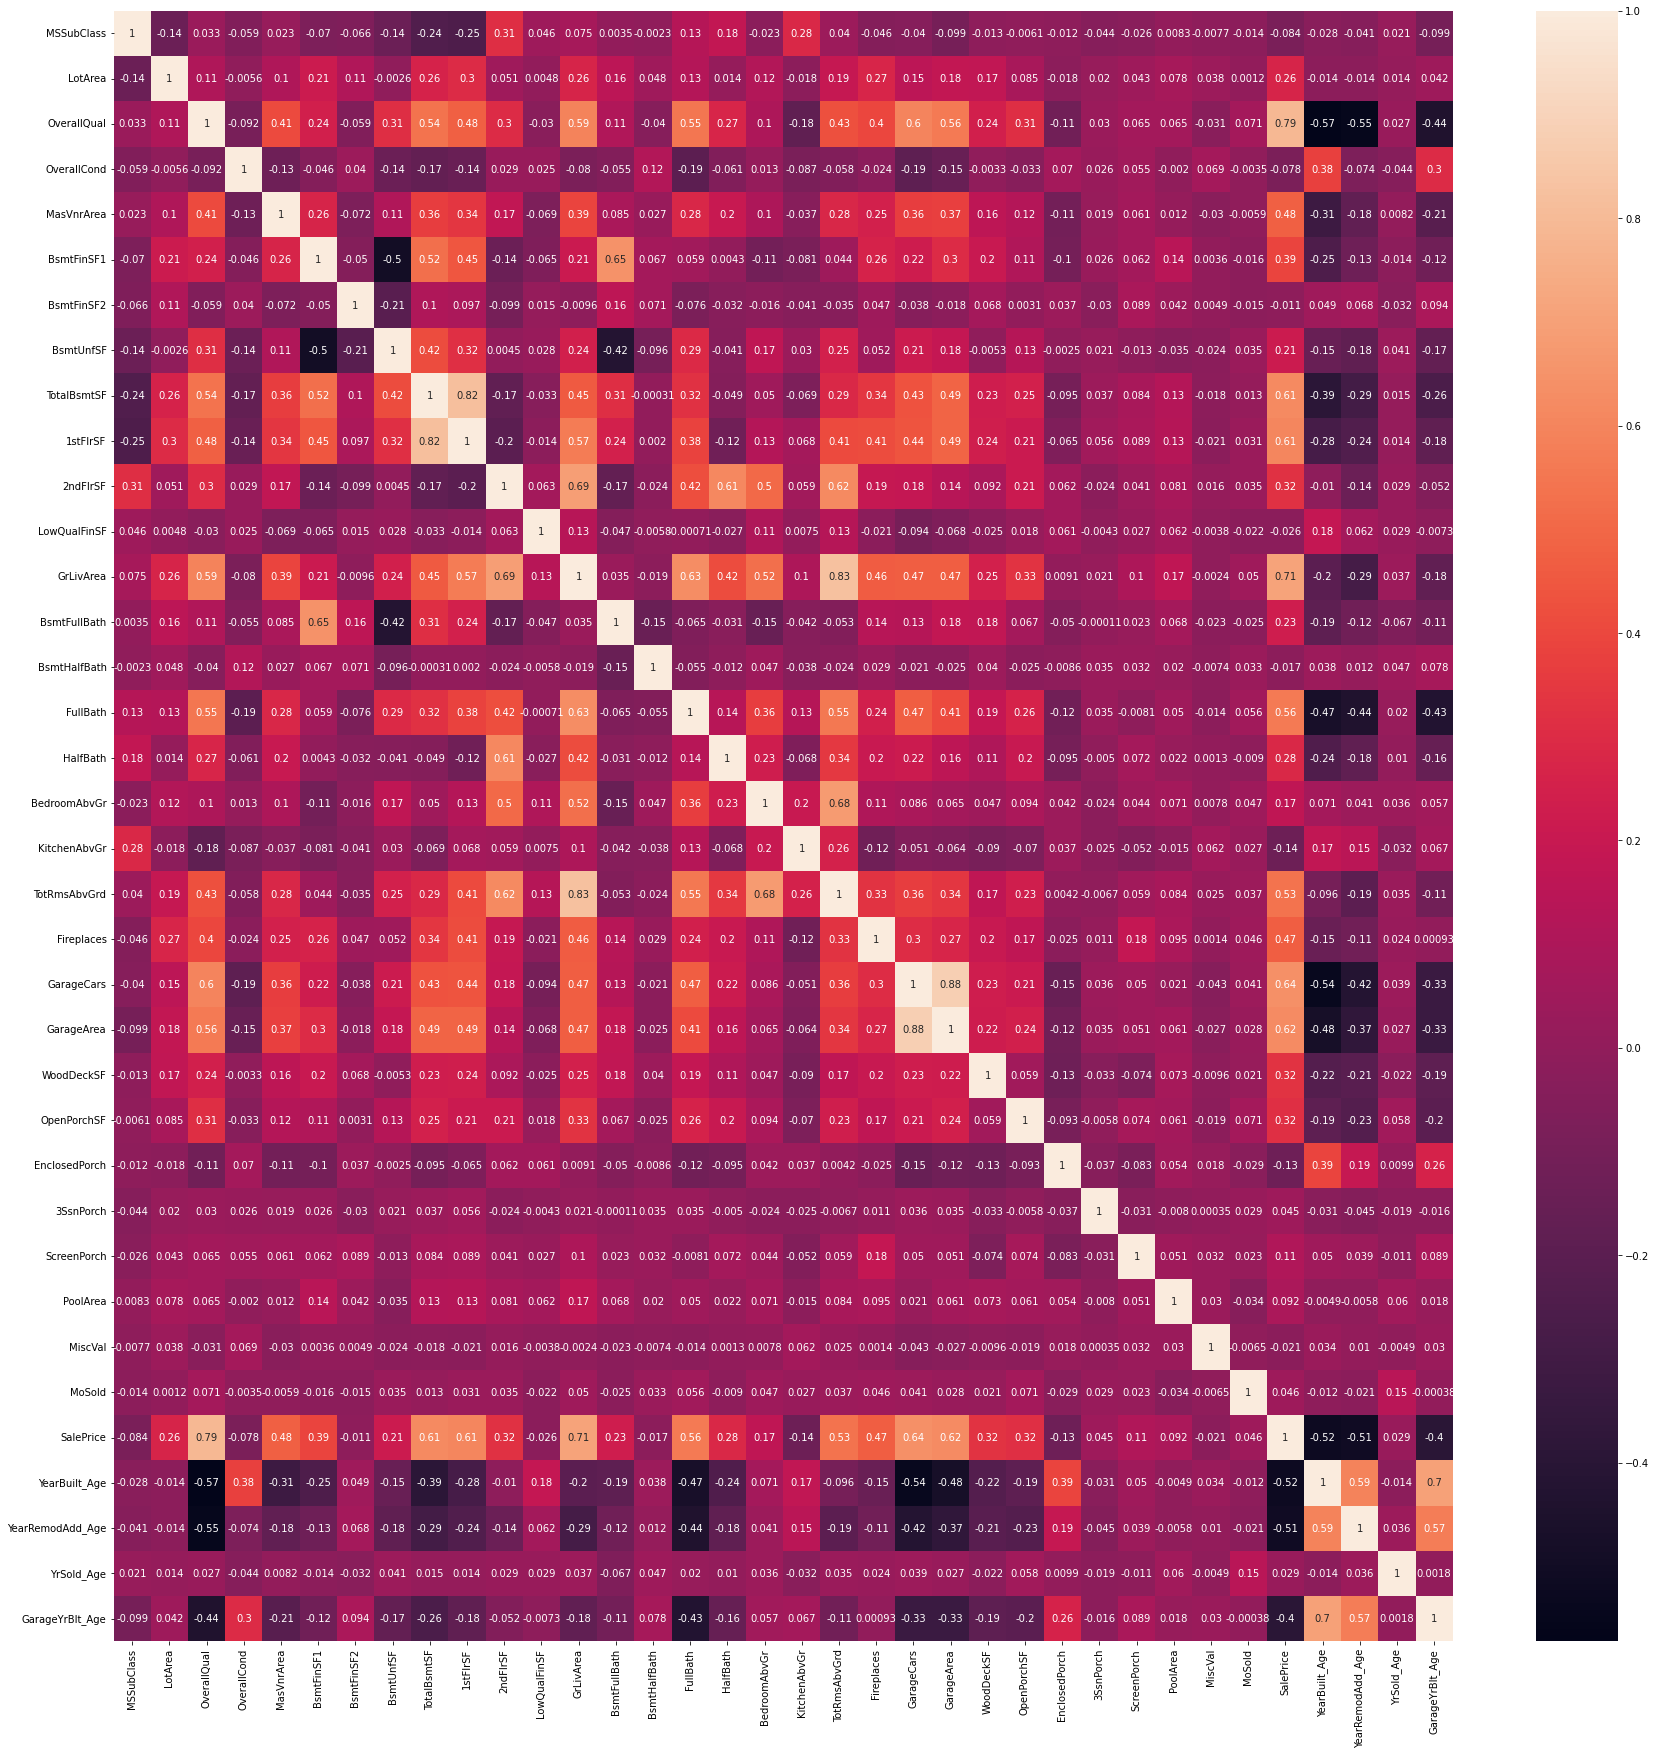

In [518]:
plt.figure(figsize=(30,30))
sns.heatmap(df[list(df.dtypes[df.dtypes!='object'].index)].corr(),annot=True)
plt.show()

Text(0, 0.5, 'Sales Price')

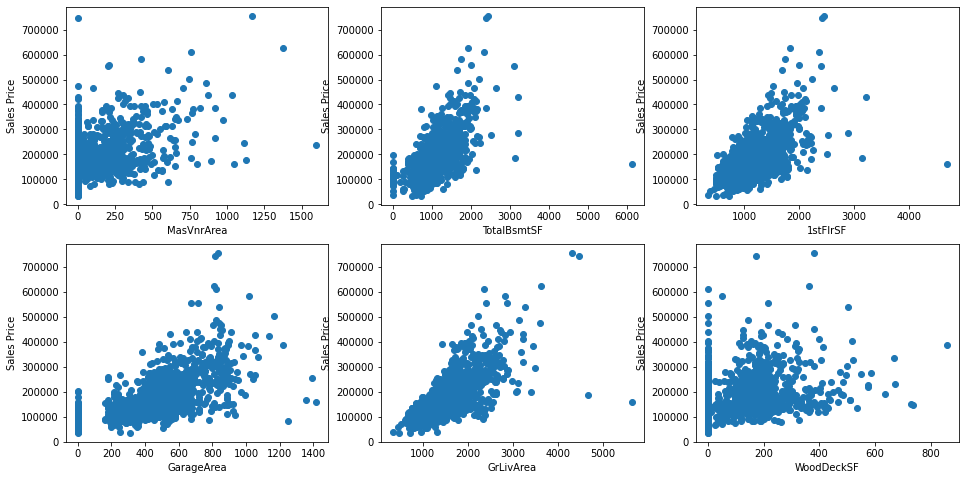

In [519]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(df.MasVnrArea, df.SalePrice)
plt.xlabel("MasVnrArea")
plt.ylabel("Sales Price")

plt.subplot(2,3,2)
plt.scatter(df.TotalBsmtSF, df.SalePrice)
plt.xlabel("TotalBsmtSF")
plt.ylabel("Sales Price")

plt.subplot(2,3,3)
plt.scatter(df['1stFlrSF'], df.SalePrice)
plt.xlabel("1stFlrSF")
plt.ylabel("Sales Price")

plt.subplot(2,3,4)
plt.scatter(df['GarageArea'], df.SalePrice)
plt.xlabel("GarageArea")
plt.ylabel("Sales Price")

plt.subplot(2,3,5)
plt.scatter(df['GrLivArea'], df.SalePrice)
plt.xlabel("GrLivArea")
plt.ylabel("Sales Price")

plt.subplot(2,3,6)
plt.scatter(df['WoodDeckSF'], df.SalePrice)
plt.xlabel("WoodDeckSF")
plt.ylabel("Sales Price")


In [520]:
for col in ['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']:
    print(df[col].value_counts())

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
TA    1348
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Unf    1294
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
Y    1365
N      95
Name: CentralAir, dtype: int64
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
Unf    686
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
TA  

In [521]:
df['LandSlope'] = df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
df['ExterQual'] = df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['CentralAir'] = df.CentralAir.map({'N':0,'Y':1})
df['KitchenQual'] = df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageFinish'] = df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['ExterCond'] = df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['LotShape'] = df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
# df['Street'] = df.Street.map({'Pave':0,'Grvl':1})
# df['Utilities'] = df.Utilities.map({'Pave':0,'Grvl':1})

In [522]:
def one_hot_encoding(df, col):
    df = pd.concat([df, pd.get_dummies(df[col], drop_first=True)], axis=1)
    df = df.drop([col], axis=1)
    return df

In [523]:
col_list = ['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st', 'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']
for col in col_list:
    df = one_hot_encoding(df, col)

In [524]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3, random_state=100)
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

In [525]:
lm = LinearRegression()

In [526]:
null_cols = df.isnull().sum()
# find out columns which have nulls
null_cols = null_cols[null_cols > 0]
null_cols

Series([], dtype: int64)

In [527]:
# scale only numerical variable
scaler = MinMaxScaler()
# Create a lit of numeric variable
numeric_var = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal']

#df_train[num_col] = scaler.fit_transform(df_train[num_col])
#df_test[num_col] = scaler.transform(df_test[num_col])

df_train[numeric_var] = scaler.fit_transform(df_train[numeric_var])
df_test[numeric_var] = scaler.transform(df_test[numeric_var])

df_train.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
210,0.058824,0.019306,3,0,0.444444,0.625,0.00,2,2,3,...,0,0,0,0,1,0,0,0,1,0
318,0.235294,0.039403,3,1,0.666667,0.500,0.16,3,2,4,...,0,0,0,0,1,0,0,0,1,0
239,0.176471,0.033981,3,0,0.555556,0.375,0.00,2,2,3,...,0,0,0,0,1,0,0,0,1,0
986,0.176471,0.017931,3,0,0.555556,0.875,0.00,2,3,3,...,0,0,0,0,1,0,0,0,1,0
1416,1.000000,0.046139,3,0,0.333333,0.625,0.00,2,2,3,...,0,0,0,0,1,0,0,0,1,0


In [528]:
X_train

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
210,0.058824,0.019306,3,0,0.444444,0.625,0.00000,2,2,3,...,0,0,0,0,1,0,0,0,1,0
318,0.235294,0.039403,3,1,0.666667,0.500,0.16000,3,2,4,...,0,0,0,0,1,0,0,0,1,0
239,0.176471,0.033981,3,0,0.555556,0.375,0.00000,2,2,3,...,0,0,0,0,1,0,0,0,1,0
986,0.176471,0.017931,3,0,0.555556,0.875,0.00000,2,3,3,...,0,0,0,0,1,0,0,0,1,0
1416,1.000000,0.046139,3,0,0.333333,0.625,0.00000,2,2,3,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,0.235294,0.031445,3,0,0.666667,0.500,0.00000,3,2,4,...,0,0,0,0,1,0,0,0,1,0
53,0.000000,0.228257,0,0,0.888889,0.500,0.00000,3,2,5,...,0,0,0,0,1,0,0,0,1,0
350,0.588235,0.029672,0,0,0.888889,0.500,0.22625,4,2,5,...,0,0,1,0,0,0,0,0,0,1
79,0.176471,0.041929,3,0,0.444444,0.625,0.00000,2,2,3,...,0,0,0,0,1,0,0,0,1,0


In [529]:
lm.fit(X_train, y_train)

LinearRegression()

In [530]:
print(lm.intercept_)
print(lm.coef_)

121993596744.38303
[-1.25839015e+04  1.07548458e+05  9.14651985e+02 -1.01485394e+03
  6.38642119e+04  4.39468757e+04  4.46515718e+04  5.93946592e+03
 -5.27602701e+03  7.55842507e+03 -3.05483309e+03  6.59995456e+03
 -2.87975427e+02 -1.06666880e+14 -4.21288592e+02 -2.78573673e+13
 -4.41484464e+13  1.15473890e+14 -1.23518404e+02 -2.65447126e+03
 -7.98508622e+12 -3.81694510e+12 -9.51925805e+11  9.61907178e+12
  4.85516020e+03 -3.90322226e+02 -6.10134626e+03 -4.00441032e+03
 -4.32239342e+04 -2.49272318e+04  4.85747496e+03  1.48817023e+04
  6.30846072e+03  1.27354297e+03  1.14264773e+04  9.43315527e+03
  4.25559619e+03 -1.24907715e+03  2.16423340e+02  1.20065668e+04
 -4.08664648e+03  1.80100464e+04  4.35319629e+03  6.52136858e+04
  1.36825010e+04 -3.03703613e+02 -2.59934326e+02 -4.18642578e+01
  5.64467773e+01 -1.45911133e+02  2.72364785e+04  3.42627515e+04
  3.14273203e+04  2.51858750e+04  6.81278906e+03 -6.64736719e+03
  2.72044336e+03  7.61030371e+03 -4.55455371e+03 -9.01186523e+01
  6.84

In [531]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric.append(mse_train_lr**0.5)

print(metric)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric.append(mse_test_lr**0.5)
print(mse_test_lr)

[0.9341350360044071, -76952723923239.19, 420789794266.42957, 2.1690760716702593e+26, 20291.172882164406]
4.952228474133012e+23


In [532]:
## There is big difference between train and test, this indicates overfitting

In [533]:
from sklearn.model_selection import GridSearchCV


In [534]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0,3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 
                    6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
folds=5
ridge = Ridge()
model_cv = GridSearchCV(estimator=ridge, param_grid=params,
scoring='neg_mean_absolute_error', cv=folds, return_train_score=True,
verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 33 candidates, totalling 165 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0, 3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [535]:
print(model_cv.best_params_)

{'alpha': 4}


In [536]:
alpha = 3
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.16289935e+04  1.89170738e+04  3.27834921e+02  7.30809993e+03
  6.92828046e+04  2.26130357e+04  3.26338010e+04  6.65796177e+03
 -1.60596673e+03  1.22208113e+04 -1.51910151e+03  8.44304280e+03
  2.05451533e+03  1.62725575e+04  2.75383115e+02  2.60401070e+03
  6.62926117e+03  1.81942030e+04  9.86565034e+02  2.56472103e+03
  4.80697803e+04  6.82454933e+04 -1.62060320e+01  6.69830992e+04
  2.11191564e+04  3.55870744e+03  2.38899269e+04  1.14252305e+04
 -9.53411281e+02 -1.21678268e+04  9.80037737e+03  3.40130215e+04
  1.80373530e+04  3.53078715e+03  2.57688967e+04  1.20452847e+04
  1.01985240e+04 -3.96124008e+03  9.14622833e+03  1.74348710e+02
  5.38990189e+02  1.54149467e+04  5.11016953e+03  3.87094935e+03
 -1.05707339e+03 -3.08244761e+02  9.54499412e+01 -6.92713726e+01
  6.97542102e+02 -3.44956450e+01  4.36863305e+03  1.34115187e+04
  1.04842154e+04  9.07441799e+03  1.69469670e+04  9.76568008e+03
  1.49335504e+04  1.12169668e+04 -9.93759139e+03 -7.87553008e+03
 -9.71676661e+02 -1.96823

In [537]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric2.append(r2_test_lr)
print(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric2.append(rss1_lr)
print(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric2.append(rss2_lr)
print(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric2.append(mse_train_lr**0.5)
print(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric2.append(mse_test_lr**0.5)
print(mse_test_lr)

0.885211469650554
0.8617504513098948
733346518994.8491
389685735208.076
717560194.7112026
889693459.3791689


In [538]:
lasso = Lasso()

model_cv = GridSearchCV(estimator=lasso, param_grid=params,
scoring='neg_mean_absolute_error', cv=folds, return_train_score=True,
verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 33 candidates, totalling 165 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0, 3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [539]:
print(model_cv.best_params_)

{'alpha': 100}


In [540]:
alpha = 3
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
print(lasso.coef_)

[-1.53555699e+04  9.82265707e+04  8.56743759e+02 -0.00000000e+00
  6.61298809e+04  4.26353682e+04  4.51603438e+04  5.99893134e+03
 -4.76751985e+03  7.56058772e+03 -3.01548266e+03  6.70331962e+03
 -1.48039982e+02  1.11810399e+05 -2.07794142e+02  4.77419190e+03
 -0.00000000e+00  1.04127701e+05 -8.16514363e+01 -2.07508968e+03
  1.60043279e+05  1.21826003e+05  1.23893170e+03  1.30385025e+05
  7.26149376e+03 -0.00000000e+00 -4.09237269e+03 -3.00108824e+03
 -3.97466520e+04 -2.29277640e+04  5.08164092e+03  1.16998903e+04
  6.83607713e+03  1.39538743e+03  1.36877562e+04  7.42876767e+03
  4.69411678e+03 -1.99887932e+03  6.16219335e+02  1.11598252e+04
 -3.56472249e+03  1.74011626e+04  4.21134973e+03  5.80801301e+04
  7.30478074e+03 -3.25605374e+02 -2.36501368e+02 -4.22666031e+01
  1.39497175e+02 -1.34014772e+02  2.43814564e+04  3.19834042e+04
  2.93767004e+04  2.37209217e+04  7.57427135e+03 -5.32216140e+03
  3.66983077e+03  8.13642725e+03 -4.87508860e+03 -6.59626004e+02
  5.42696885e+02  1.98940

In [541]:

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric3.append(r2_test_lr)
print(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric3.append(rss1_lr)
print(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric3.append(rss2_lr)
print(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric3.append(mse_train_lr**0.5)
print(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric3.append(mse_test_lr**0.5)
print(mse_test_lr)


0.9337098218483548
0.8231046515623722
423506348962.43396
498617135201.82733
414389773.9358454
1138395285.8489208


In [542]:
lr_table = {'Metric': ['R2 Score (Train)', 'R2 Score (Test)', 'RSS Train', 'RSS Test', 'MSE Train', 'MSE Test'],
'Linear Refression': metric}
lr_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Linear Regression'])
lr_metric
lr_table
# rg_metric = pd.Series(metric2, name="Ridge")
# ls_metric = pd.Series(metric2, name="Lasso")
# final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)
# final_metric

{'Metric': ['R2 Score (Train)',
  'R2 Score (Test)',
  'RSS Train',
  'RSS Test',
  'MSE Train',
  'MSE Test'],
 'Linear Refression': [0.9341350360044071,
  -76952723923239.19,
  420789794266.42957,
  2.1690760716702593e+26,
  20291.172882164406,
  703720716913.5361]}

In [543]:
lr_table = {'Metric': ['R2 Score (Train)', 'R2 Score (Test)', 'RSS Train', 'RSS Test', 'MSE Train', 'MSE Test'],
'Linear Refression': metric}
lr_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Linear Regression'])
lr_table

{'Metric': ['R2 Score (Train)',
  'R2 Score (Test)',
  'RSS Train',
  'RSS Test',
  'MSE Train',
  'MSE Test'],
 'Linear Refression': [0.9341350360044071,
  -76952723923239.19,
  420789794266.42957,
  2.1690760716702593e+26,
  20291.172882164406,
  703720716913.5361]}

In [544]:
print(lm.coef_)
print(ridge.coef_)
print(lasso.coef_)



[-1.25839015e+04  1.07548458e+05  9.14651985e+02 -1.01485394e+03
  6.38642119e+04  4.39468757e+04  4.46515718e+04  5.93946592e+03
 -5.27602701e+03  7.55842507e+03 -3.05483309e+03  6.59995456e+03
 -2.87975427e+02 -1.06666880e+14 -4.21288592e+02 -2.78573673e+13
 -4.41484464e+13  1.15473890e+14 -1.23518404e+02 -2.65447126e+03
 -7.98508622e+12 -3.81694510e+12 -9.51925805e+11  9.61907178e+12
  4.85516020e+03 -3.90322226e+02 -6.10134626e+03 -4.00441032e+03
 -4.32239342e+04 -2.49272318e+04  4.85747496e+03  1.48817023e+04
  6.30846072e+03  1.27354297e+03  1.14264773e+04  9.43315527e+03
  4.25559619e+03 -1.24907715e+03  2.16423340e+02  1.20065668e+04
 -4.08664648e+03  1.80100464e+04  4.35319629e+03  6.52136858e+04
  1.36825010e+04 -3.03703613e+02 -2.59934326e+02 -4.18642578e+01
  5.64467773e+01 -1.45911133e+02  2.72364785e+04  3.42627515e+04
  3.14273203e+04  2.51858750e+04  6.81278906e+03 -6.64736719e+03
  2.72044336e+03  7.61030371e+03 -4.55455371e+03 -9.01186523e+01
  6.84265625e+02  2.94510